# CS308 Машин сургалт хичээлийн Лабораторийн ажил 2 болон 3 заавар


1. Зааврыг уншиж None оронд кодыг бичиж үр дүнг гаргана уу.

2. Бүлэг бүрийн ард нэмэлт даалгавар байгаа.

3. Тайланд олон ангилалтай тохиолдолд шугаман ангилагч хэрхэн сургах талаар хэлэлцүүлэг, жишээний хамт бичнэ үү

1 2 3 даалгавруудыг хийж гүйцэтгэсэн тохиолдолд бүрэн ажиллуулсан ipynb файлыг zip (заавал) өргөтгөлтэй хадгалан лабораторийн ажил илгээх гэсэн цахим хичээлийн хаягаар хугацаа хоцролгүй илгээнэ. Нэмэлт сан (+95mb) ашигласан тохиолдолд тухайн санг татаж оруулсан кодыг зөвхөн бичнэ үү. (санг zip-д оруулах шаардлагагүй)
Хугацаа 4-р долоо хоног дуустал. (хугацаа хэтэрсэн өдрөөр -0.1 амралтын өдрүүд тооцохгүй)

# Linear Classifier

Бид үндсэн суурь төрлийн хэд хэдэн шугаман ангилагчид болох perceptron, дундаж perceptron болон Stochastic gradient аргуудыг судалж, тестийн өгөгдлийн үр дүнгүүдэд үзүүлсэн тэдний гүйцэтгэл дээр үндэслэн харьцуулах болно. Эдгээр аргууд нь нарийн төвөгтэй өгөгдөлд үр дүн муу боловч бага хэмжээний өгөгдөлд илүү сайн хурдан гүйцэтгэлийг үзүүлдэгээрээ давуу талтай юм.

Эдгээр нь хоёртын ангилагчид бөгөөд бид тэдгээрийг хооронд нь ангилахын тулд $y \in \{1,-1\}$ гэж ашиглах болно.

### 1. Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import pylab
from string import punctuation, digits
import os
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
%matplotlib inline

## 2. Building Models
### 2.1 Perceptron algorithm:
Perceptron алгоритм нь хиймэл мэдрэлийн сүлжээний хамгийн энгийн төрөл юм.

Энэ нь хоёр ангит ангилалын асуудлуудад ашиглаж болох ганц нейронын загвар бөгөөд хожим нь илүү том сүлжээг хөгжүүлэх үндэс суурийг тавьж өгдөг.
- Загвар нь сургалтын өгөгдөл болон зарим тохиолдлын анхан шатны жинг (ихэвчлэн 0) оролт болгон авдаг.
- Дараа нь өгөгдлийн жишээ/мөр бүрээр явж, хэрэв буруу ангилах бол параметрүүдэд шинэчлэлт хийнэ.
- Жишээнүүдийг зөв ангилсан шугаман ангилагч байдаг бол perceptron алгоритм нь үүнийг гарцаагүй олох болно.

Илүү ихийг эндээс: http://ciml.info/dl/v0_8/ciml-v0_8-ch03.pdf

ямар тохиолдолд буруу ангилсан байх:

$$y^{(i)}(\theta.x^{(i)}+\theta_0)\leq 0 $$
энд,

 $ x^{(i)} $ оролтын вектор

 $y^{(i)}$ оролтын шошго

 $\theta$ болон $\theta_0$ нь загварын параметрүүд


Алгоритм буруу ангилсны дараа параметрүүдийг дараах дүрмийн дагуу шинэчилнэ:

Хэрэв $$y^{(i)}(\theta.x^{(i)}+\theta_0)\leq 0 $$ эндээс
        
$$\theta=\theta + y^{(i)} x^{(i)}$$
$$\theta_0=\theta_0 + y^{(i)}$$


Одоо бид эцсийн үр дүнгээ авахын тулд энэ алгоритмыг T epochs дээр ажиллуулах хэрэгтэй. Ингээд эхлүүлье.

In [ ]:
def perceptron_single_step_update(feature_vector,label,current_theta,current_theta_0):

    if label * (np.dot(current_theta, feature_vector) + current_theta_0) <= 0:

        current_theta = current_theta + label * feature_vector
        current_theta_0 = current_theta_0 + label

    return (current_theta,current_theta_0)

In [ ]:
def perceptron(feature_matrix, labels, T):

    update=(np.zeros(feature_matrix.shape[1]),0)
    for t in range(T):
        for i in range(feature_matrix.shape[0]):

            update=perceptron_single_step_update(feature_matrix[i],labels[i],update[0],update[1])

    return(update)

###### Загваруудынхаа гүйцэтгэлийг шалгахын тулд алдагдлын функцийг тодорхойлъё.

Хяналтын цэгүүд шийдвэрийн заагийг (үнэлэмжийн зааг) давах бүрт алдагдал болно. Үүнд:

$$loss = 1-y^{(i)}(\theta.x^{(i)}+\theta_0) $$

Мөн шугаман ангилагчаа түргэн дүрсжүүлэн харах функц юм.

In [ ]:
def hinge_loss_single(feature_vector, label, theta, theta_0):

    y = np.dot(theta, feature_vector) + theta_0
    loss = max(0.0, 1 - y * label)
    return loss
    raise NotImplementedError

def hinge_loss_full(feature_matrix, labels, theta, theta_0):

    loss=0
    for vec, y in zip(feature_matrix, labels):
        loss=loss+hinge_loss_single(vec,y,theta,theta_0)

    return (loss/len(labels))


In [ ]:
def plot_classifier(theta,theta_0, data): # to visualise our model
    good=data[0]==1
    plt.scatter(data[1][good],data[2][good],c='blue',alpha=0.8,label='Classified True')
    plt.scatter(data[1][~good],data[2][~good],c='r',alpha=0.8,label='Classified False')

    xmin,xmax=plt.axis()[:2]

    x=np.linspace(xmin,xmax)
    y = -(theta[0]*x + theta_0) / (theta[1] + 1e-16)
    plt.plot(x,y,label='Classifier',lw=2)
    plt.xlabel("Values of x1")
    plt.ylabel("Values of x2")
    plt.title("Linear classifier for a 2-d feature vector")
    plt.legend()

In [ ]:
data=np.loadtxt("/content/toy_data.tsv",delimiter='\t',unpack=True)
y,X= data[0],data[[1,2]]
print(X.shape, y.shape)

(2, 200) (200,)


Average hinge loss for Perceptron algorithm is 0.6729
[2.358 1.796] -1.0


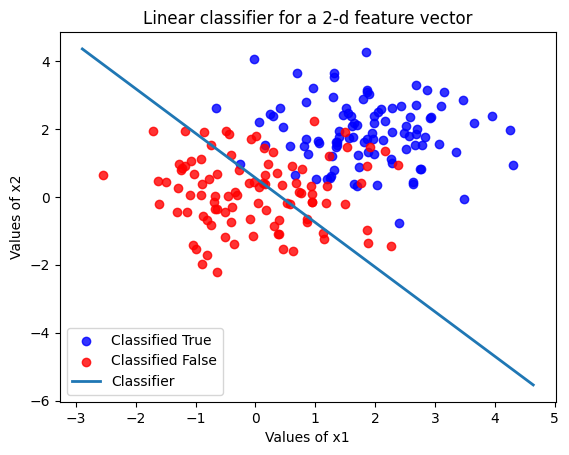

In [ ]:
theta,theta_0=perceptron(X.transpose(),y,20)
plot_classifier(theta,theta_0, data)
print(f"Average hinge loss for Perceptron algorithm is {hinge_loss_full(X.transpose(),y,theta,theta_0):.4f}")
print(theta, theta_0)

<div style='text-align: justify;'>
Энд буруу ангилсан олон цэг байгаа учраас өндөр алдагдалтай байна. Үүнийг хэрхэн багасгах вэ?
Энд авч үзэх ёстой нэг чухал зүйл бол шинэчлэлтүүдийг гүйцэтгэх дараалал юм. Бид зүгээр л алгоритмыг байнгын дарааллаар гүйлгэлж байна. Энэ нь сайн санаа биш юм.

500 эерэг, 500 сөрөг жишээнээс бүрдсэн өгөгдлийн багц дээр perceptron алгоритм юу хийхийг авч үзье гэж бодвол. Эхний хэдэн эерэг жишээг (магадгүй тав) харсны дараа жишээ бүр эерэг гэдгийг шийдэж, юу ч сурахаа болино. Энэ нь хэсэг хугацаанд (дараагийн 495 жишээ) сөрөг жишээнүүдийг орж ирэх хүртэл сайн байх болно. Дараа нь бүх зүйлийг сөрөг гэж урьдчилан таамаглаж эхлэхэд хэсэг хугацаа (магадгүй арван жишээ) шаардагдана. Нэг өгөгдөл дамжуулах нэг төгсгөлд энэ нь үнэхээр цөөхөн жишээнээс л суралцах байсан (энэ тохиолдолд арван тав).


Тиймээс, өмнөх жишээнээс сургамж авч, epoch бүрийн өмнө оролтын өгөгдлийн дарааллыг дахин холих буюу өөр өөрөөр авч үзэх хэрэгтэй.
</div>

In [ ]:
def get_order(n_samples):
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices

In [ ]:
def perceptron_stochaistic(feature_matrix, labels, T):

    update=(np.zeros(feature_matrix.shape[1]),0)
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            update=perceptron_single_step_update(feature_matrix[i],labels[i],update[0],update[1])
    return(update)

Одоо илүү сайн хийсэн эсэхээ харцгаая!

Average hinge loss for Perceptron algorithm is 0.3388
[2.7345 3.342 ] -5.0


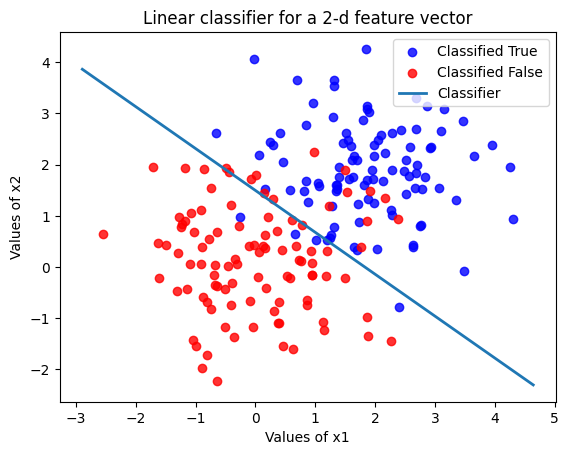

In [ ]:
theta,theta_0=perceptron_stochaistic(X.transpose(),y,15)
plot_classifier(theta,theta_0, data)
print(f"Average hinge loss for Perceptron algorithm is {hinge_loss_full(X.transpose(),y,theta,theta_0):.4f}")
print(theta, theta_0)

#### Илүү сайжирсан байна!

Алдагдал нь 0.3388 хүртэл буурсан байна. Учир нь одоо ч буруу ангилсаар байгаа хэд хэдэн зайлшгүй цэг байгаа юм.

### 2.2 Average Perceptron:

Одоо дундаж perceptron алгоритм руу шилжье.

Дундаж перцептрон нь анхны perceptron алгоритмд өөрчлөлт оруулах болно. Алгоритмыг ажиллуулах үед үндсэн алгоритм нь шинэчлэгдсээр байгаа тул магадгүй зөрчилтэй чиглэлд параметрүүдийг нугалсан тул тэдгээр параметрүүдийн дундажыг эцсийн хариулт болгон авсан нь дээр. Алгоритмын шинэчлэлт бүр өмнөхтэй адил байна. Буцаасан параметрүүд θ , гэсэн хэдий ч, n алхмуудын дунджаар θ тодорхойлогдож байна:

$$\theta_{final}=\frac{1}{n}(\theta^{(1)}+\theta^{(2)}+\theta^{(3)}+...+\theta^{(n)}) $$

In [ ]:
def avg_perceptron(feature_matrix, labels, T):
    update=(np.zeros(feature_matrix.shape[1]),0)
    theta_sum=np.array(update[0])
    theta_0_sum=update[1]
    count=0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            update=perceptron_single_step_update(feature_matrix[i],labels[i],update[0],update[1])
            theta_sum = theta_sum + update[0]
            theta_0_sum = theta_0_sum + update[1]
            count=count+1

    avg_theta=theta_sum/count
    avg_theta_0=theta_0_sum/count

    return (avg_theta,avg_theta_0)

Average hinge loss for Perceptron algorithm is 0.2766
[2.270698 2.556028] -4.608


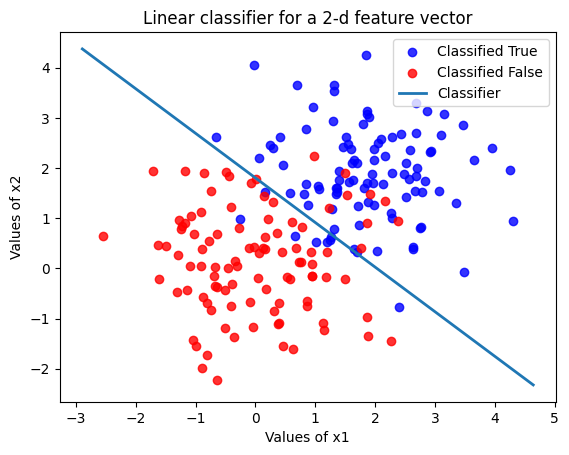

In [ ]:
theta,theta_0=avg_perceptron(X.transpose(),y,5)
plot_classifier(theta,theta_0, data)
print(f"Average hinge loss for Perceptron algorithm is {hinge_loss_full(X.transpose(),y,theta,theta_0):.4f}")
print(theta, theta_0)

За тэгэхээр бид парамаметрүүдийг дунджаар гаргаснаар алдагдлыг улам багасгаж чадна. Гэхдээ бүх юм үргэлж тийм энгийн байдаггүй.

 $$ Everything\:  should  \:be\: made\: as\: simple\: as\: possible,\: but\: no\: simpler.\: -\: Albert\: Einstein$$

### 2.3 Pegasos Algorithm:

Pegasos алгоритм нь энгийн стохастик градиент зохистой. Энд байгаа зорилго нь зардлын үйл ажиллагааг багасгах явдал юм.
Зардлын функц нь хоёр зүйлийн нийлбэр юм. Үүнд:
- Loss function: Хажуугийн хил рүү хальтирсан цэгүүдээс болж гарсан алдагдлыг тодорхойлно.
- Regularisation: Энэ нь бат бөх загвартай байхын тулд захын хил хязгаарыг шийдвэрийн хил хязгаараас аль болох хол байлгахыг хичээдэг.


$$ J(\theta,\theta_0)\: =\: \frac{1}{n} \sum{\underbrace{loss_h (y^{(i)}(\theta.x^{(i)}+\theta_0))}_{Hinge\: loss}\: +\:\underbrace{\frac{\lambda}{2}\parallel{\theta}\:\parallel}_{Regularisation}}  $$

- Параметрүүдийг шинэчлэхийн тулд хуучин параметрүүд нь зардлын функцийн уламжлалын сөрөг чиглэлд хэлбэлздэг. Энэ нь дамжуулалт бүрт бид $\nabla J(\theta,\theta_0)$ хамгийн бага үнэ цэнэ рүү аваачдаг
- Perceptron-аас ялгаатай нь SGD алхам бүрт шинэчлэлт хийнэ. Хэдийгээр алдагдал гараагүй ч гэсэн тогтмол болгох нэр томьёоны оролцооны улмаас өөрчлөлт гарна.
- Бид бас бодит үйл ажиллагааны үнэ цэнэ ижил эсвэл бүр түүнээс ч өндөр хаа нэгтээ аваачиж болох хэт том алхмуудыг хийхгүй байхын тулд алхмын хэмжээ (эсвэл суралцах хурд) оруулах болно.

In [ ]:
def pegasos_single_step_update(feature_vector,label,L,eta,current_theta,current_theta_0):

    loss_h = label * (np.dot(current_theta, feature_vector) + current_theta_0)

    if(loss_h<=1): # loss_h
        current_theta=current_theta*(1-eta*L)+eta*np.dot(label,feature_vector)
        current_theta_0=current_theta_0+eta*label
    else:
        current_theta=current_theta*(1-eta*L)

    return (current_theta,current_theta_0)


def pegasos(feature_matrix, labels, T, L):

    update=(np.zeros(feature_matrix.shape[1]),0) #why not just theta and theta zero
    count=0
    for t in range(T):

        for i in get_order(feature_matrix.shape[0]):
            count=count+1
            eta=1/np.sqrt(count)

            update=pegasos_single_step_update(feature_matrix[i],labels[i],L,eta,update[0],update[1])
    return update

Average hinge loss for Pegasos algorithm is 0.2509


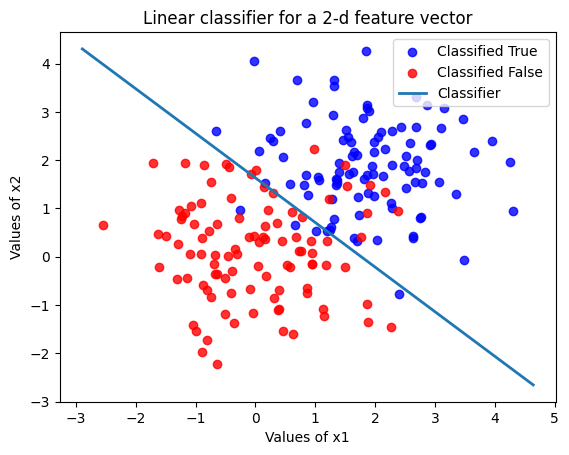

In [ ]:
theta,theta_0=pegasos(X.transpose(),y,T=15,L=0.1)
plot_classifier(theta,theta_0, data)
print(f"Average hinge loss for Pegasos algorithm is {hinge_loss_full(X.transpose(),y,theta,theta_0):.4f}")

### Linear classifier Даалгавар

titanic санг ашиглан сургалт хийн үр дүнг дүгнэж бичнэ үү

In [ ]:
data =pd.read_csv('/content/train.csv')

In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_ids=test["PassengerId"]

In [ ]:
def clean(data):
    data=data.drop(["Ticket","Cabin","Name","PassengerId"], axis=1)
    cols=["SibSp","Parch","Age","Fare"]

    for col in cols:
        data[col].fillna(data[col].median(), inplace= True)
    data["Embarked"].fillna("U", inplace= True)

    return data
data= clean(data)
test=clean(test)

In [ ]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

cols=["Sex","Embarked"]

for col in cols:
    data[col]=le.fit_transform(data[col])
    test[col]=le.transform(test[col])
    print(le.classes_)

data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y=data['Survived']
X=data.drop(columns=["Survived"])

In [ ]:


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:
clf=LogisticRegression(random_state=0, max_iter=1000)

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
predictions=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8100558659217877

In [ ]:
submission_preds= clf.predict(test)

In [ ]:
df=pd.DataFrame({
    "PassengerId":test_ids.values,
    "Survived":submission_preds
})

# 3. Logistic regression

Энд логистик регресс хэрхэн ажилладаг талаар тайлбарлаж, энгийн Numpy дээр хэрэгжүүлнэ.
Логистик регресс нь хяналттай сургалтын ангиллын алгоритм бөгөөд энэ нь ангиллыг тооцоолох боломжтой гэсэн үг юм.
label-тэй ажиглалт дээр үндэслэсэн шинэ ажиглалт хийж шалгах дасгал ажил.

## Өгөгдлийн сан үүсгэх

Зөвхөн 100 ажиглалт, 2 онцлог бүхий хоёртын ангиллын бодлогод логистик регрессийг хэрэглэе.

In [ ]:
X, y = make_classification(
        n_samples=200,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=0,
        n_clusters_per_class=2)
print(X.shape, y.shape)
# X=X.transpose()

(200, 2) (200,)


Text(0, 0.5, '$X_2$')

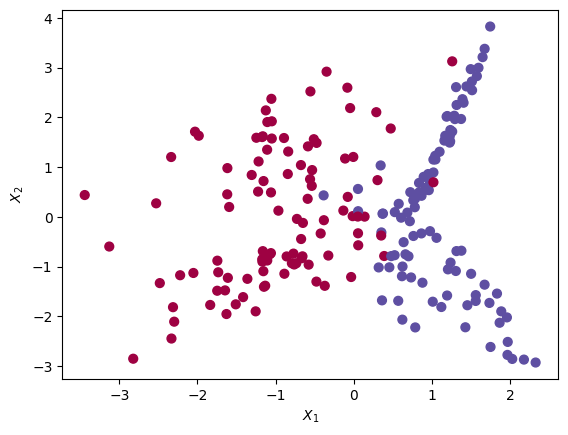

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
# blue dots = 1, red dots = 0

Бидэнд $X$ 2 feature-тэй $\theta$ гэсэн 100 ажиглалт байгаа бөгөөд тэдгээрийн $y$ label-ийг бид мэднэ. Бид шинэ ажиглалтын label-ийг таамаглах боломжтой юу?

## 3. Logistic regression

Логистик регресс нь ажиглалт тодорхой ангилалд хамаарах магадлалыг загварчилдаг.
Эдгээр магадлалыг үүсгэхийн тулд логистик регресс нь **sigmoid** функцийг ашигладаг. Энэ функц нь бодит тоог 0-ээс 1-ийн хоорондох утгуудад буулгадаг.

\begin{equation}
g(z) = \frac{1}{1+e^{-z}}
\end{equation}

Дараах байдлаар таамаглалыг тодорхойлж болно $h(X) = g(X \theta)$
энд
- $\theta$ коэффициэнт вектор.
- $X$ нь бүх ажиглалтын вектор юм.

$h(X)$ бидэнд 1 хүртэлх таамаглал өгнө,
- хэрэв $ X \theta \geqslant 0 $, бол $h(X) \geqslant 0.5$, таамаглал $y = 1$
- хэрэв $ X \theta < 0 $, бол $h(X) < 0.5$, таамаглал $y = 0$

In [ ]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

XX = add_intercept(X)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

print(XX)
print(theta)
print(h)

[[ 1.      3.      1.     ...  0.      7.25    2.    ]
 [ 1.      1.      0.     ...  0.     71.2833  0.    ]
 [ 1.      3.      0.     ...  0.      7.925   2.    ]
 ...
 [ 1.      3.      0.     ...  2.     23.45    2.    ]
 [ 1.      1.      1.     ...  0.     30.      0.    ]
 [ 1.      3.      1.     ...  0.      7.75    1.    ]]
[0. 0. 0. 0. 0. 0. 0. 0.]
None


# Loss function

loss функцийг дараах байдалтай тодорхойлно,
\begin{equation}
J(\theta) = \frac{1}{m}(-y \log(h) - (1 - y) \log(1 - h))
\end{equation}
энд $m$ жишээний тоо.

алдааг буруу ангилсан тохиолдлын жишээ,
- хэрэв $y=0$ болон $h\rightarrow 1$, тэгвэл $J(\theta)\rightarrow ∞$  (хүчтэй алдаа)
- хэрэв $y=0$ болон $h\rightarrow 0$, тэгвэл $J(\theta)\rightarrow 0$  (бага алдаа)
- хэрэв $y=1$ болон $h\rightarrow 0$, тэгвэл $J(\theta)\rightarrow ∞$  (хүчтэй алдаа)
- хэрэв $y=1$ болон $h\rightarrow 1$, тэгвэл $J(\theta)\rightarrow 0$  (бага алдаа)

In [ ]:
#алдааг тодорхойлох
cost = (-y*np.log(h)-(1-y)*np.log(1-h)).mean()
print(cost)

None


## Gradiend descent

Таамаглалыг сайжруулахын тулд, бид алдааны $J(\theta)$ утгыг багасгах шаардлагатай. Үүнийг $\theta$ утгыг тохируулах замаар гүйцэтгэнэ. Энэ нь алдааны функцээс уламжлал авч $\theta$ бүрийг тохируулснаар хийгдэнэ. Градиент нь хэр их алдаа хэр хэмжээгээр коэффициэнтийг өөрлөхийг илэрхийлнэ. Энэ аргыг *Gradient Descent* гэдэг.
\begin{equation}
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\end{equation}
энд $\alpha$ бол сурах хурд.

Ингэснээр бид
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} X^T (h - y)
\end{equation}

In [ ]:
m = y.size
alpha = 0.01

gradient = np.dot(XX.T, (h-y))/m
theta -= alpha * gradient

print(gradient)
print(theta)

## Training the model

Бид дээрх алхамыг коэффициент тохиртол давтан хийх хэрэгтэй.

In [ ]:
num_iter = 50000
cost_list = []

for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    cost_list.append(cost)

    gradient = np.dot(XX.T, (h-y))/m
    theta -= alpha * gradient


    if i % 10000 == 0:
        print('Cost: {}'.format(cost))

print('Adjusted coefficient: {}'.format(theta))

## Plot the loss function

In [ ]:
plt.plot(range(num_iter), cost_list)

Алдааны утга багасах нь сургалт амжилттай явагдаж буйн илрэл юм.

## Таамаглалуудыг дэвшүүлэх

Бид таамаглалын магадлалуудыг sigmoid функц авч гаргана.

In [ ]:
preds_prob = calc_h(XX, theta)
print(preds_prob)

Өмнө нь үзсэнчлэн sigmoid функцийн шийдвэрийн хязгаарыг бид 0.5 гэж авсан ба үүнийг round функц ашиглан тэгшитгэж болно.

In [ ]:
preds = preds_prob.round()
print(preds)

Эцэст нь бид сургалтын үр дүнг гаргах боломжтой боллоо.

In [ ]:
score_numpy = (preds == y).mean()
print('Score Numpy: {}'.format(score_numpy))

Сургасан өгөгдөлд өндөр үр дүн үзүүлж байгаа боловч бид сургалтанд ашиглагдаагүй өгөгдлөөр туршиж үзэж болно.

In [ ]:
new_x = np.array([0, -0.8, 0.8])   # new observation (-0.8, 0.8)  with an intercept of 1
print(new_x)
preds_prob_new_x = calc_h(new_x, theta).round()
print("шинэ өгөгдлийн таамагласан утга: ", preds_prob_new_x)

## Шийдвэрийн хязгаарыг дүрсэлж харвал

In [ ]:
plt.figure(figsize=(10, 6))

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

grid = add_intercept(grid)
probs = calc_h(grid, theta)
probs = probs.reshape(xx1.shape)
print(probs)
ax = plt.gca()
plt.contourf(xx1, xx2, probs, levels=25, cmap=plt.cm.Spectral, alpha=0.8)
plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black') # decision boundary at 0.5
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.plot(-0.8, 0.8, 'rx', markersize=20, markeredgewidth=2)  # new observation correctly classified as 1 (blue)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])

## Sklearn хэрэгжүүлэлт

Мэдээж logistic regression нь аль хэдийн Scikit-learn хөгжүүлэгдсэн байгаа.

In [ ]:
model = LogisticRegression(C=1e20, solver='lbfgs')
model.fit(X, y)
preds = model.predict(X)

score_sklearn = (preds == y).mean()
print('Score Sklearn: {}'.format(score_sklearn))
print(model.intercept_, model.coef_)

### Logistic regression Даалгавар

titanic санг ашиглан сургалт хийн үр дүнг дүгнэж бичнэ үү

# 4. PCA Бууруулах арга
Үндсэн бүрэлдэхүүн хэсгийн анализ буюу PCA нь том хэмжээний мэдээллийн хүснэгт дэх мэдээллийн агуулгыг илүү хялбараар харж, задлан шинжилж болох жижиг багц "хураангуй индекс"-ээр нэгтгэн дүгнэх боломжийг олгодог статистикийн горим юм.

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

In [ ]:
iris.get("feature_names")

In [ ]:
pca = PCA(n_components=3)
pca.fit(iris.data)
X = pca.transform(iris.data)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=iris.target)

### PCA Даалгавар

mnist санг дээрх аргаар бууруулан дүрсэлж харуулна уу

In [ ]:
train = pd.read_csv('train.csv',sep=',', usecols=[1,2,4,5],skiprows=0)
test = pd.read_csv('test.csv',sep=',', usecols=[1,3,4],skiprows=0)

In [ ]:
test.head()

In [ ]:
train.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
SS = StandardScaler()

train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])
print(le.classes_)

In [ ]:
train = train.dropna()
test = test.dropna()

In [ ]:
train_y = train['Survived']
train_x = train.drop(columns=['Survived'])

In [ ]:
train_processed = SS.fit_transform(train)
test_processed = SS.fit_transform(test)

In [ ]:
train.head()

In [ ]:
print("First 5 rows of scaled training data:", train_processed[:10])

In [ ]:
train_y = train_y.to_numpy()

In [ ]:
theta,theta_0=perceptron(train_processed.transpose(),train_y,20)
plot_classifier(theta,theta_0, data)
print(f"Hinge loss: {hinge_loss_full(train_processed.transpose(),train_y,theta,theta_0):.4f}")

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
print(f"Training data shape: {train_processed.shape}, Labels shape: {train_y.shape})

In [ ]:
model.fit(train_processed, train_y)
output = model.predict(test_processed)
print(output)